In [6]:
N = 15

def mirror4(r, c, n=N):
    """4-way symmetry over vertical+horizontal axes for an n x n board."""
    return {
        (r, c),
        (r, n - 1 - c),
        (n - 1 - r, c),
        (n - 1 - r, n - 1 - c),
    }

# Seed ONLY the top-left quadrant (rows 0..7, cols 0..7). Include center lines if they appear there.
seeds = {
    "3L": [(0, 0), (0, 7), (7, 0)],
    "2L": [(1, 1), (2, 2), (3, 3)],
    "3P": [(1, 5), (5, 1), (4,4), (5, 5), (7, 7)],  # center star treated as 3P at (7,7)
    "2P": [(0, 3), (3, 0), (2, 6), (6, 2), (7,3),(3,7), (6,6)],
}

# Expand seeds to full board using symmetry
bonuses = {}
for kind, coords in seeds.items():
    full = set()
    for r, c in coords:
        full |= mirror4(r, c, N)
    bonuses[kind] = sorted([list(x) for x in full])  # JSON-friendly [r,c]

# Build a 15x15 grid filled with ""
grid = [["  " for _ in range(N)] for _ in range(N)]
for kind, coords in bonuses.items():
    for r, c in coords:
        grid[r][c] = kind
# example: print grid
for row in grid:
    print(row)

['3L', '  ', '  ', '2P', '  ', '  ', '  ', '3L', '  ', '  ', '  ', '2P', '  ', '  ', '3L']
['  ', '2L', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '2L', '  ']
['  ', '  ', '2L', '  ', '  ', '  ', '2P', '  ', '2P', '  ', '  ', '  ', '2L', '  ', '  ']
['2P', '  ', '  ', '2L', '  ', '  ', '  ', '2P', '  ', '  ', '  ', '2L', '  ', '  ', '2P']
['  ', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '  ']
['  ', '3P', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '3P', '  ']
['  ', '  ', '2P', '  ', '  ', '  ', '2P', '  ', '2P', '  ', '  ', '  ', '2P', '  ', '  ']
['3L', '  ', '  ', '2P', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '2P', '  ', '  ', '3L']
['  ', '  ', '2P', '  ', '  ', '  ', '2P', '  ', '2P', '  ', '  ', '  ', '2P', '  ', '  ']
['  ', '3P', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '3P', '  ']
['  ', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '  ']

In [21]:
import json

# Redefine N and mirror4 for this cell to ensure correctness in isolation
N = 15

def mirror4(r, c, n=N):
    """4-way symmetry over vertical+horizontal axes for an n x n board."""
    return {
        (r, c),
        (r, n - 1 - c),
        (n - 1 - r, c),
        (n - 1 - r, n - 1 - c),
    }

# Directly copied from cell 2 for reproducibility
seeds = {
    "3L": [(0, 0), (0, 7), (7, 0)],
    "2L": [(1, 1), (2, 2), (3, 3)],
    "3P": [(1, 5), (5, 1), (4,4), (5, 5), (7, 7)],  # center star treated as 3P at (7,7)
    "2P": [(0, 3), (3, 0), (2, 6), (6, 2), (7,3),(3,7), (6,6)],
}

# Expand seeds to full board using symmetry
bonuses = {}
for kind, coords in seeds.items():
    full = set()
    for r, c in coords:
        full |= mirror4(r, c, N)
    bonuses[kind] = sorted([list(x) for x in full])  # JSON-friendly [r,c]

# Write bonuses to bonus.json
with open('bonus.json', 'w') as f:
    json.dump(bonuses, f)

print('bonus.json written with:', {k: len(v) for k, v in bonuses.items()})



bonus.json written with: {'3L': 8, '2L': 12, '3P': 17, '2P': 24}


In [26]:
import json

# Load bonus.json directly (not using scoring.py's load_bonus_squares)
with open('bonus.json', 'r') as f:
    bonus_json = json.load(f)

# Build a 15x15 grid for the bonus squares from bonus.json
bonus_grid = [["  " for _ in range(N)] for _ in range(N)]
for kind, positions in bonus_json.items():
    for r, c in positions:
        bonus_grid[r][c] = kind

# Print the board in the same way as above
for row in bonus_grid:
    print(row)


['3L', '  ', '  ', '2P', '  ', '  ', '  ', '3L', '  ', '  ', '  ', '2P', '  ', '  ', '3L']
['  ', '2L', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '2L', '  ']
['  ', '  ', '2L', '  ', '  ', '  ', '2P', '  ', '2P', '  ', '  ', '  ', '2L', '  ', '  ']
['2P', '  ', '  ', '2L', '  ', '  ', '  ', '2P', '  ', '  ', '  ', '2L', '  ', '  ', '2P']
['  ', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '  ']
['  ', '3P', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '3P', '  ']
['  ', '  ', '2P', '  ', '  ', '  ', '2P', '  ', '2P', '  ', '  ', '  ', '2P', '  ', '  ']
['3L', '  ', '  ', '2P', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '2P', '  ', '  ', '3L']
['  ', '  ', '2P', '  ', '  ', '  ', '2P', '  ', '2P', '  ', '  ', '  ', '2P', '  ', '  ']
['  ', '3P', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '3P', '  ']
['  ', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '  ', '  ', '3P', '  ', '  ', '  ', '  ']

In [34]:
from scoring import calculate_score, load_bonus_squares
import json

# Load chars and bonus
with open('chars.json', 'r') as f:
    chars = json.load(f)

bonus = load_bonus_squares('bonus.json')

In [36]:
# Test case 1: 3+8 where 8 is existing on 3P
print('Test H8: 6×12+/- (6)3=9')
equation_H8 = [
    (7, 7, '6', True),    # new tile 6 at H8
    (7, 8, '×', True),    # new tile × at I8
    (7, 9, '12', True),   # new tile 12 at J8
    (7,10, '+/-', True),  # new tile +/- at K8
    (7,11, '(6)', True),  # new tile (6) at L8
    (7,12, '3', True),    # new tile 3 at M8
    (7,13, '=', True),    # new tile = at N8
    (7,14, '9', True),    # new tile 9 at O8
]
score_H8 = calculate_score(equation_H8, chars, bonus)
print(f'Score: {score_H8}')
# If you want to break down the face values and bonuses, insert that here, or update as needed:
print()

# Test case 2: 10=10 on 3L (no piece multipliers)
print("Test 2: 12G 1,.,+,3,=,1,4,+,5 where . is 6 and already on the board")
equation2 = [
    (11, 6, '1',  True),    # 12G: new tile 1
    (11, 7, '6',  False),   # 12H: existing tile 6 already on board
    (11, 8, '+',  True),    # 12I: new tile +
    (11, 9, '3',  True),    # 12J: new tile 3
    (11,10, '=',  True),    # 12K: new tile =
    (11,11, '1',  True),    # 12L: new tile 1
    (11,12, '4',  True),    # 12M: new tile 4
    (11,13, '+',  True),    # 12N: new tile +
    (11,14, '5',  True),    # 12O: new tile 5
]
score2 = calculate_score(equation2, chars, bonus)
print(f'Score: {score2}')
# Manually verify breakdown if desired.
print()

# Test case 3: O8 5,+/,1,+,.,=,1,1 where . is 5 already on the board
# NOTE: O8 is a VERTICAL play at column O (14), starting at row 8
# The equation is: 5 + 1 + 5 = 1 1 (vertical)
print("Test 3: O8 5,+/,1,+,.,=,1,1 where . is 5 already on the board")
print("This is a VERTICAL play at column O (14)")
equation3 = [
    (7, 14, '5',  True),     # Row 8, Col O: new tile 5 (on 3L)
    (8, 14, '+/-', True),    # Row 9, Col O: new tile +/- (value 1)
    (9, 14, '1',  True),     # Row 10, Col O: new tile 1
    (10, 14, '+', True),     # Row 11, Col O: new tile +
    (11, 14, '5', False),    # Row 12, Col O: existing tile 5 (the . tile)
    (12, 14, '=', True),     # Row 13, Col O: new tile =
    (13, 14, '1', True),     # Row 14, Col O: new tile 1
    (14, 14, '1', True),     # Row 15, Col O: new tile 1 (on 3L)
]
score3 = calculate_score(equation3, chars, bonus)
print(f'Score: {score3}')
print('Expected: 11 base * 9 (3L x 3L) = 99')
print()

# Test case 4: 0 on 3P
print('Test 4: 0 on 3P (new tile)')
# First, add equation_H8 to the board as existing tiles (all is_new=False)
equationH8_on_board = [(r, c, v, False) for (r, c, v, is_new) in equation_H8]
# Now add the test move (7,5,'0',True) and (7,6,'+/-',True)
# commit 
equation4 = (
    equationH8_on_board + 
    [
        (7, 5, '0', True),     # new tile 0 at H6 (col 5)
        (7, 6, '+', True),   # new tile +/- at H7 (col 6)
    ]
)
score4 = calculate_score(equation4, chars, bonus)
print(f'Score: {score4}')
print()

# Simulate: first move is at H8: 8,=,8 (i.e., row 7 col 7: '8', row 7 col 8: '=', row 7 col 9: '8')
# Second move is at H11: 0,/,10,+,0 (i.e., row 10 col 7: '0', row 10 col 8: '/', row 10 col 9: '10', row 10 col 10: '+', row 10 col 11: '0')

print("Test: commit h11 0,/,10,+,0, assuming h8 8,=,8 is already placed")
# Place the first play: H8 8,=,8 as existing (on the board)
equation1 = [
    (7, 7, '8', False),   # H8 (row 7, col 7)  -- on board
    (7, 8, '=', False),   # H9 (row 7, col 8)  -- on board
    (7, 9, '8', False)    # H10 (row 7, col 9) -- on board
]
# Now, simulate the new play at H11: 0,/,10,+,0 (all new) -- but with columns 10 to 14
equation2 = [
    (7,10,  '0',  True),  # K11 (col 10)
    (7,11,  '÷',  True),  # L11 (col 11)
    (7,12, '10',  True),  # M11 (col 12)
    (7,13,  '+',  True),  # N11 (col 13)
    (7,14,  '0',  True),  # O11 (col 14)
]
# Combine into full equation for scoring (existing + new tiles)
# NOTE: Scoring must include ALL tiles in the equation, not just new tiles
equation_full = equation1 + equation2
score = calculate_score(equation_full, chars, bonus)
print(f'Score for full equation: {score}')


Test H8: 6×12+/- (6)3=9
Score: 48

Test 2: 12G 1,.,+,3,=,1,4,+,5 where . is 6 and already on the board
Score: 32

Test 3: O8 5,+/,1,+,.,=,1,1 where . is 5 already on the board
This is a VERTICAL play at column O (14)
Score: 99
Expected: 11 base * 9 (3L x 3L) = 99

Test 4: 0 on 3P (new tile)
Score: 14

Test: commit h11 0,/,10,+,0, assuming h8 8,=,8 is already placed
Score for full equation: 42


In [38]:
from collections import defaultdict, deque

WORDS = ["CAT", "CATS"]

class Node:
    __slots__ = ("edges", "terminal")
    def __init__(self):
        self.edges = {}      # char -> node_id
        self.terminal = False

class GADDAG:
    def __init__(self):
        self.nodes = [Node()]  # node 0 = root

    def new_node(self):
        self.nodes.append(Node())
        return len(self.nodes) - 1

    def insert(self, s: str):
        cur = 0
        for ch in s:
            if ch not in self.nodes[cur].edges:
                self.nodes[cur].edges[ch] = self.new_node()
            cur = self.nodes[cur].edges[ch]
        self.nodes[cur].terminal = True

    @staticmethod
    def gaddag_forms(word: str):
        """
        Common GADDAG convention:
        For each anchor position i:
          reverse(word[:i+1]) + '#' + word[i+1:]
        Also insert the plain word (useful for first-move / no-anchor cases).
        """
        forms = set()
        forms.add(word)  # optional but commonly included in implementations
        for i in range(len(word)):
            left_including_anchor = word[:i+1][::-1]
            right_after_anchor = word[i+1:]
            forms.add(left_including_anchor + "#" + right_after_anchor)
        return sorted(forms)

    def build_from_dictionary(self, words):
        all_forms = defaultdict(list)
        for w in words:
            forms = self.gaddag_forms(w)
            all_forms[w] = forms
            for f in forms:
                self.insert(f)
        return all_forms

    def print_forms(self, all_forms):
        for w, forms in all_forms.items():
            print(f"{w}:")
            for f in forms:
                print(f"  {f}")
            print()

    def print_adjacency(self):
        print("Adjacency list (node_id --ch--> node_id, [T] if terminal):")
        for i, node in enumerate(self.nodes):
            term = " [T]" if node.terminal else ""
            if node.edges:
                edges_str = ", ".join(f"{ch}->{nid}" for ch, nid in sorted(node.edges.items()))
                print(f"{i}{term}: {edges_str}")
            else:
                print(f"{i}{term}: (no edges)")

    def print_tree(self, max_depth=6):
        """
        Pretty-print the trie-like structure up to max_depth to keep it readable.
        """
        def dfs(node_id, prefix, depth):
            node = self.nodes[node_id]
            if node.terminal:
                print(prefix + " (WORD END)")
            if depth >= max_depth:
                if node.edges:
                    print(prefix + " ...")
                return
            for ch, nxt in sorted(node.edges.items()):
                dfs(nxt, prefix + ch, depth + 1)

        print(f"Tree view from root (max_depth={max_depth}):")
        dfs(0, "", 0)


# ---- demo ----
g = GADDAG()
forms_map = g.build_from_dictionary(WORDS)

print("GADDAG forms inserted (per word):")
g.print_forms(forms_map)

g.print_tree(max_depth=10)
print()
g.print_adjacency()


GADDAG forms inserted (per word):
CAT:
  AC#T
  C#AT
  CAT
  TAC#

CATS:
  AC#TS
  C#ATS
  CATS
  STAC#
  TAC#S

Tree view from root (max_depth=10):
AC#T (WORD END)
AC#TS (WORD END)
C#AT (WORD END)
C#ATS (WORD END)
CAT (WORD END)
CATS (WORD END)
STAC# (WORD END)
TAC# (WORD END)
TAC#S (WORD END)

Adjacency list (node_id --ch--> node_id, [T] if terminal):
0: A->1, C->5, S->18, T->11
1: C->2
2: #->3
3: T->4
4 [T]: S->15
5: #->6, A->9
6: A->7
7: T->8
8 [T]: S->16
9: T->10
10 [T]: S->17
11: A->12
12: C->13
13: #->14
14 [T]: S->23
15 [T]: (no edges)
16 [T]: (no edges)
17 [T]: (no edges)
18: T->19
19: A->20
20: C->21
21: #->22
22 [T]: (no edges)
23 [T]: (no edges)


Number of terminal (TER) nodes: 39


/var/folders/h1/_n_bj8qj1nd9nhqqdqkdgdt40000gn/T/ipykernel_39518/1429245661.py:119: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
/var/folders/h1/_n_bj8qj1nd9nhqqdqkdgdt40000gn/T/ipykernel_39518/1429245661.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0)  # Add padding around the plot


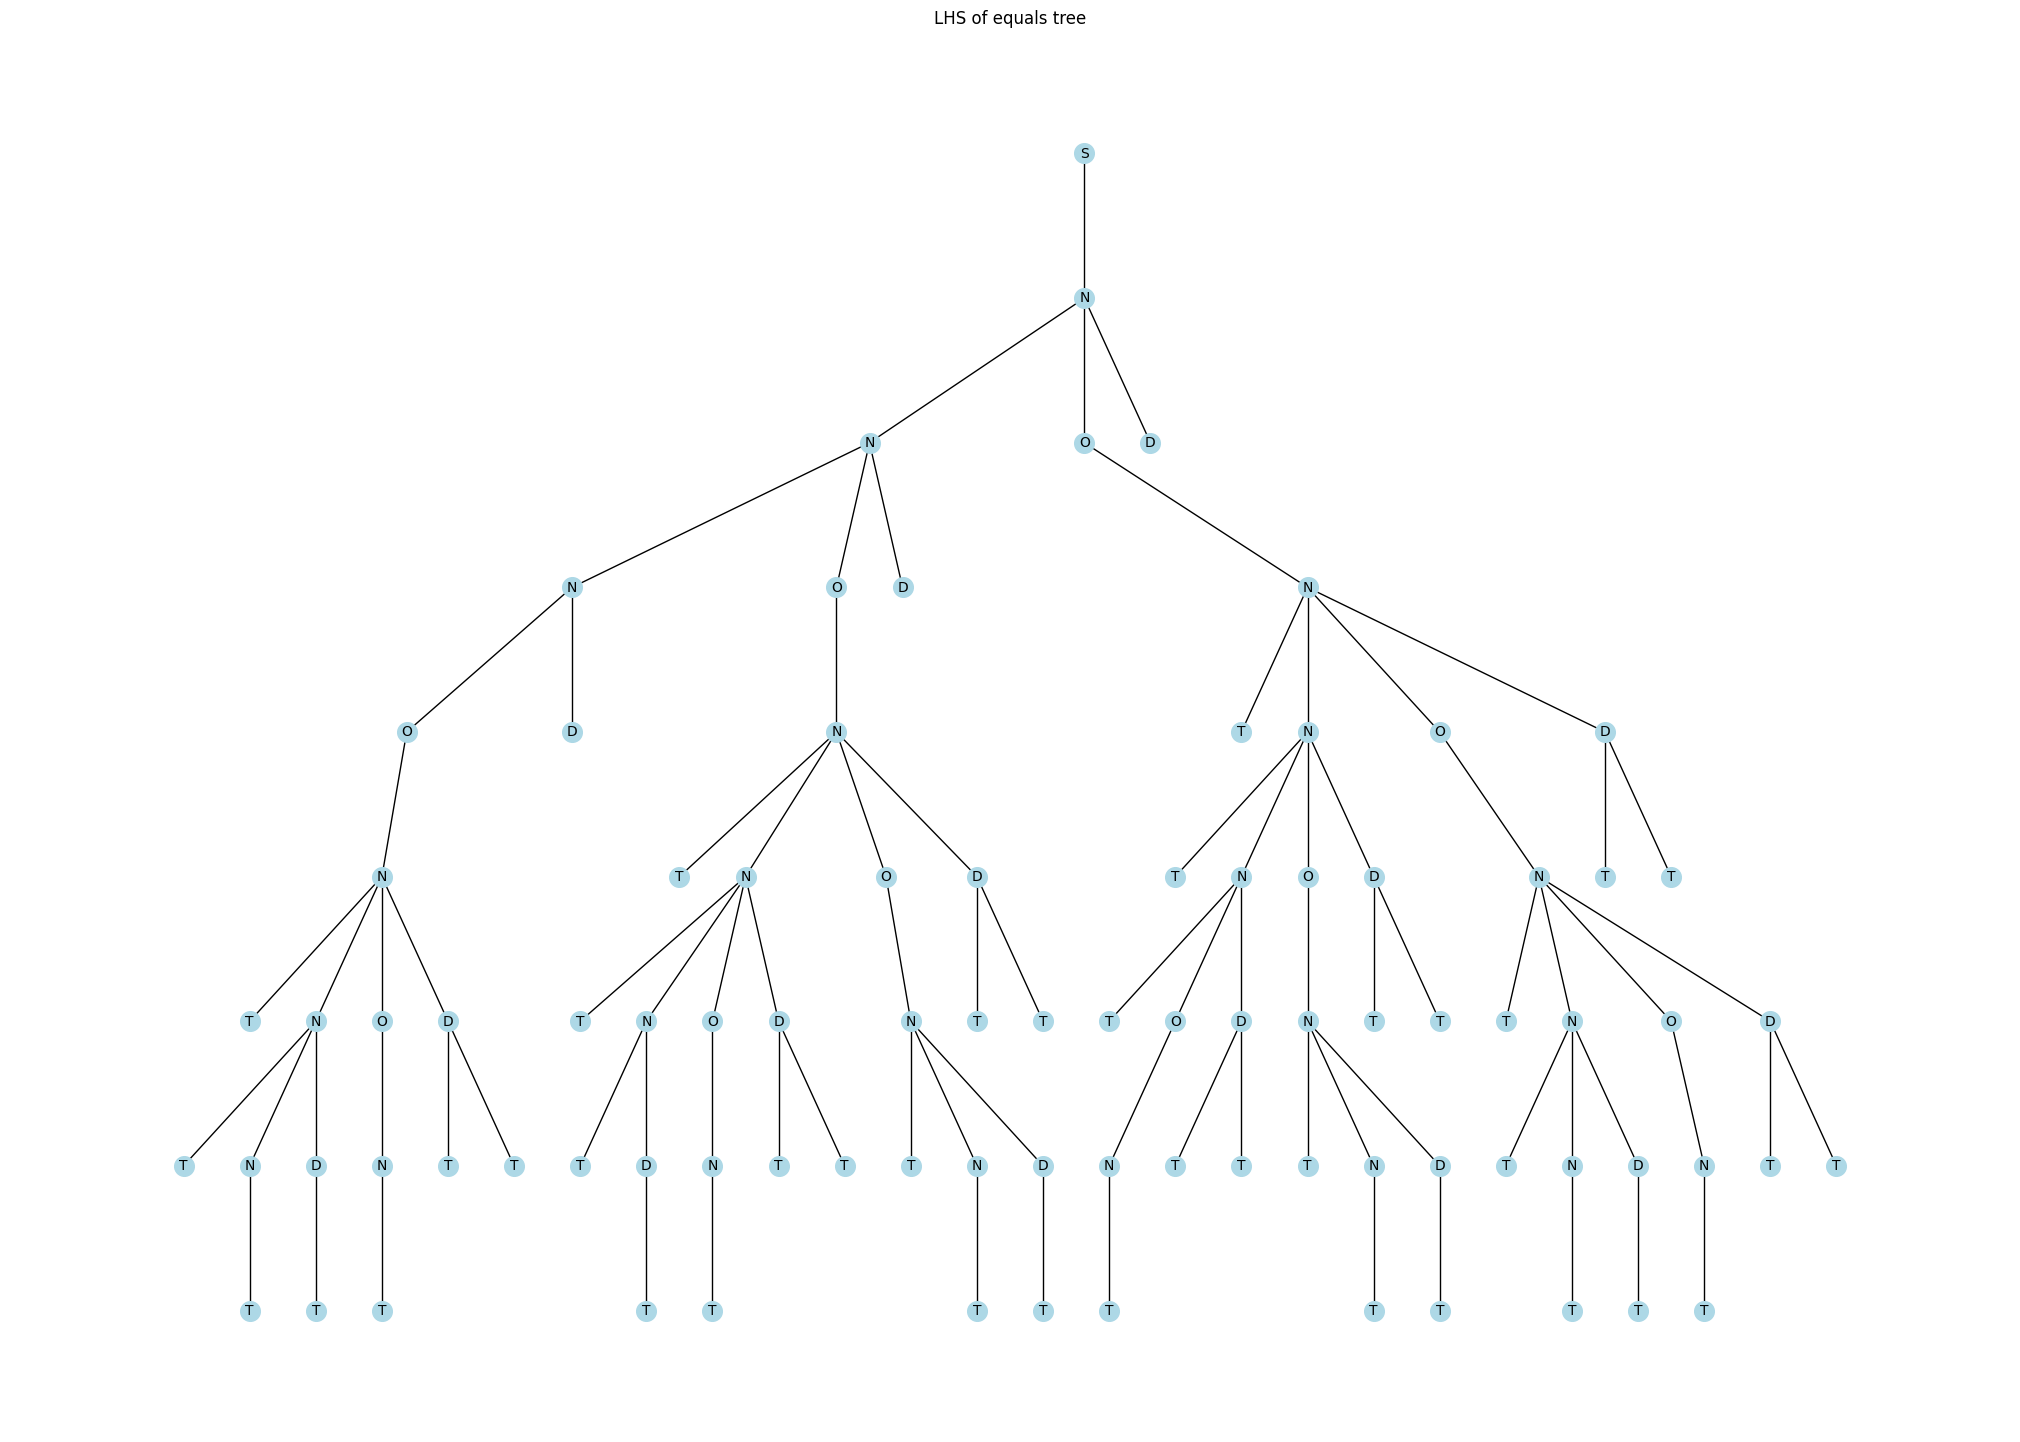

In [46]:
from anytree import Node, RenderTree

# TREE CONSTRUCTION CONSTANTS
MAX_DEPTH = 7  # root counts as level 0 now
MAX_CONTIG_NUM = 3

# Entity types
START = "S"
NUM = "N"
OP = "O"
DASH = "D"
TER = "T"

def build_lhs_equals_tree():
    # Root is "S" at depth 0
    root = Node(START)
    # Branch an "N" from "S"
    n_node = Node(NUM, parent=root)

    def add_children(parent, depth, path, num_streak, has_op):
        """
        parent: the anytree.Node object to add children to
        depth: current depth (root "S" is now 0, first "N" child is depth 1)
        path: list of entity types so far (excluding TER)
        num_streak: how many contiguous NUM are on this path
        has_op: whether an OP exists on this path
        """
        # If at max depth, cannot add children (TER does not count in depth)
        if depth >= MAX_DEPTH:
            # May add TER if allowed rules, but no child nodes otherwise
            # At the last depth, do not add any "O" (OP) nodes without terminal
            # (only add TER if allowed, do NOT add OP, NUM, or DASH children)
            if (parent.name == NUM or parent.name == DASH) and has_op:
                Node(TER, parent=parent)
            return

        # rule 7: TER only allowed after NUM or - AND only if OP exists on path
        if (parent.name == NUM or parent.name == DASH) and has_op:
            Node(TER, parent=parent)

        # Only continue if not at TER or end of path
        if parent.name == TER:
            return

        if parent.name == NUM:
            # Can branch to NUM (if not over num streak), OP, -
            if num_streak < MAX_CONTIG_NUM:
                add_children(Node(NUM, parent=parent), depth+1, path+[NUM], num_streak+1, has_op)
            # Can branch to OP only if not at the next depth being the last allowed non-terminal depth
            if depth+1 < MAX_DEPTH:
                add_children(Node(OP, parent=parent), depth+1, path+[OP], 0, True)
            # Can branch to DASH but must not do NUM -> DASH -> NUM (rule 4)
            add_children(Node(DASH, parent=parent), depth+1, path+[DASH], 0, has_op)
        elif parent.name == OP:
            # OP can only go to NUM
            # Only allow OP->NUM if next depth does not exceed MAX_DEPTH (i.e. NUM won't be left stranded at last non-terminal level)
            add_children(Node(NUM, parent=parent), depth+1, path+[NUM], 1, has_op)
        elif parent.name == DASH:
            # - can only go to TER, and cannot be in the middle (do not allow - -> NUM)
            if has_op:  # rule 7
                Node(TER, parent=parent)
            # Do not add further (no dash -> num per rule 4)

    # Begin recursion from the "N" node (child of S, depth=1, root is depth=0)
    add_children(n_node, 1, [START, NUM], 1, False)
    return root

# --- Clean pass to remove any O's at the last level that don't have a TER child ---

def prune_last_level_Os_without_terminal(node, depth, max_depth):
    """
    Remove OP ("O") nodes at depth==max_depth that do not have a "T" child.
    This is a post-build tree cleaning step.
    """
    to_remove = []
    for child in node.children:
        # Post-order traversal to go bottom-up
        prune_last_level_Os_without_terminal(child, depth+1, max_depth)
        if (
            child.name == OP
            and depth+1 == max_depth
            and not any(grandchild.name == TER for grandchild in child.children)
        ):
            to_remove.append(child)
    for child in to_remove:
        child.parent = None  # Remove node from tree

# Build and display the tree using anytree and matplotlib
import matplotlib.pyplot as plt
import networkx as nx

def build_nx_graph(node, G, parent=None):
    """Recursively add nodes/edges from anytree to nx graph."""
    G.add_node(id(node), label=node.name)
    if parent is not None:
        G.add_edge(id(parent), id(node))
    for child in node.children:
        build_nx_graph(child, G, node)

tree_root = build_lhs_equals_tree()
# Remove O's at last non-terminal level that have no terminal children
prune_last_level_Os_without_terminal(tree_root, 0, MAX_DEPTH)

G = nx.DiGraph()
build_nx_graph(tree_root, G)

# Count terminals ("T")
def count_terminals(node):
    count = 1 if node.name == TER else 0
    for child in node.children:
        count += count_terminals(child)
    return count

num_terminals = count_terminals(tree_root)
print(f"Number of terminal (TER) nodes: {num_terminals}")

# Position using graphviz 'dot' for better tree layout if available
try:
    pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
except Exception:
    pos = nx.spring_layout(G)

labels = nx.get_node_attributes(G, 'label')
plt.figure(figsize=(20, 14))  # Increased figure size
nx.draw(G, pos, with_labels=True, labels=labels, arrows=False, node_size=200, node_color='lightblue', font_size=10)
plt.title("LHS of equals tree")  # Add more padding to the title
plt.tight_layout(pad=3.0)  # Add padding around the plot
plt.show()


Number of terminal (TER) nodes in RHS tree: 32


/var/folders/h1/_n_bj8qj1nd9nhqqdqkdgdt40000gn/T/ipykernel_39518/1378408718.py:108: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  rhs_pos = nx.nx_pydot.graphviz_layout(rhs_G, prog='dot')
/var/folders/h1/_n_bj8qj1nd9nhqqdqkdgdt40000gn/T/ipykernel_39518/1378408718.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0)


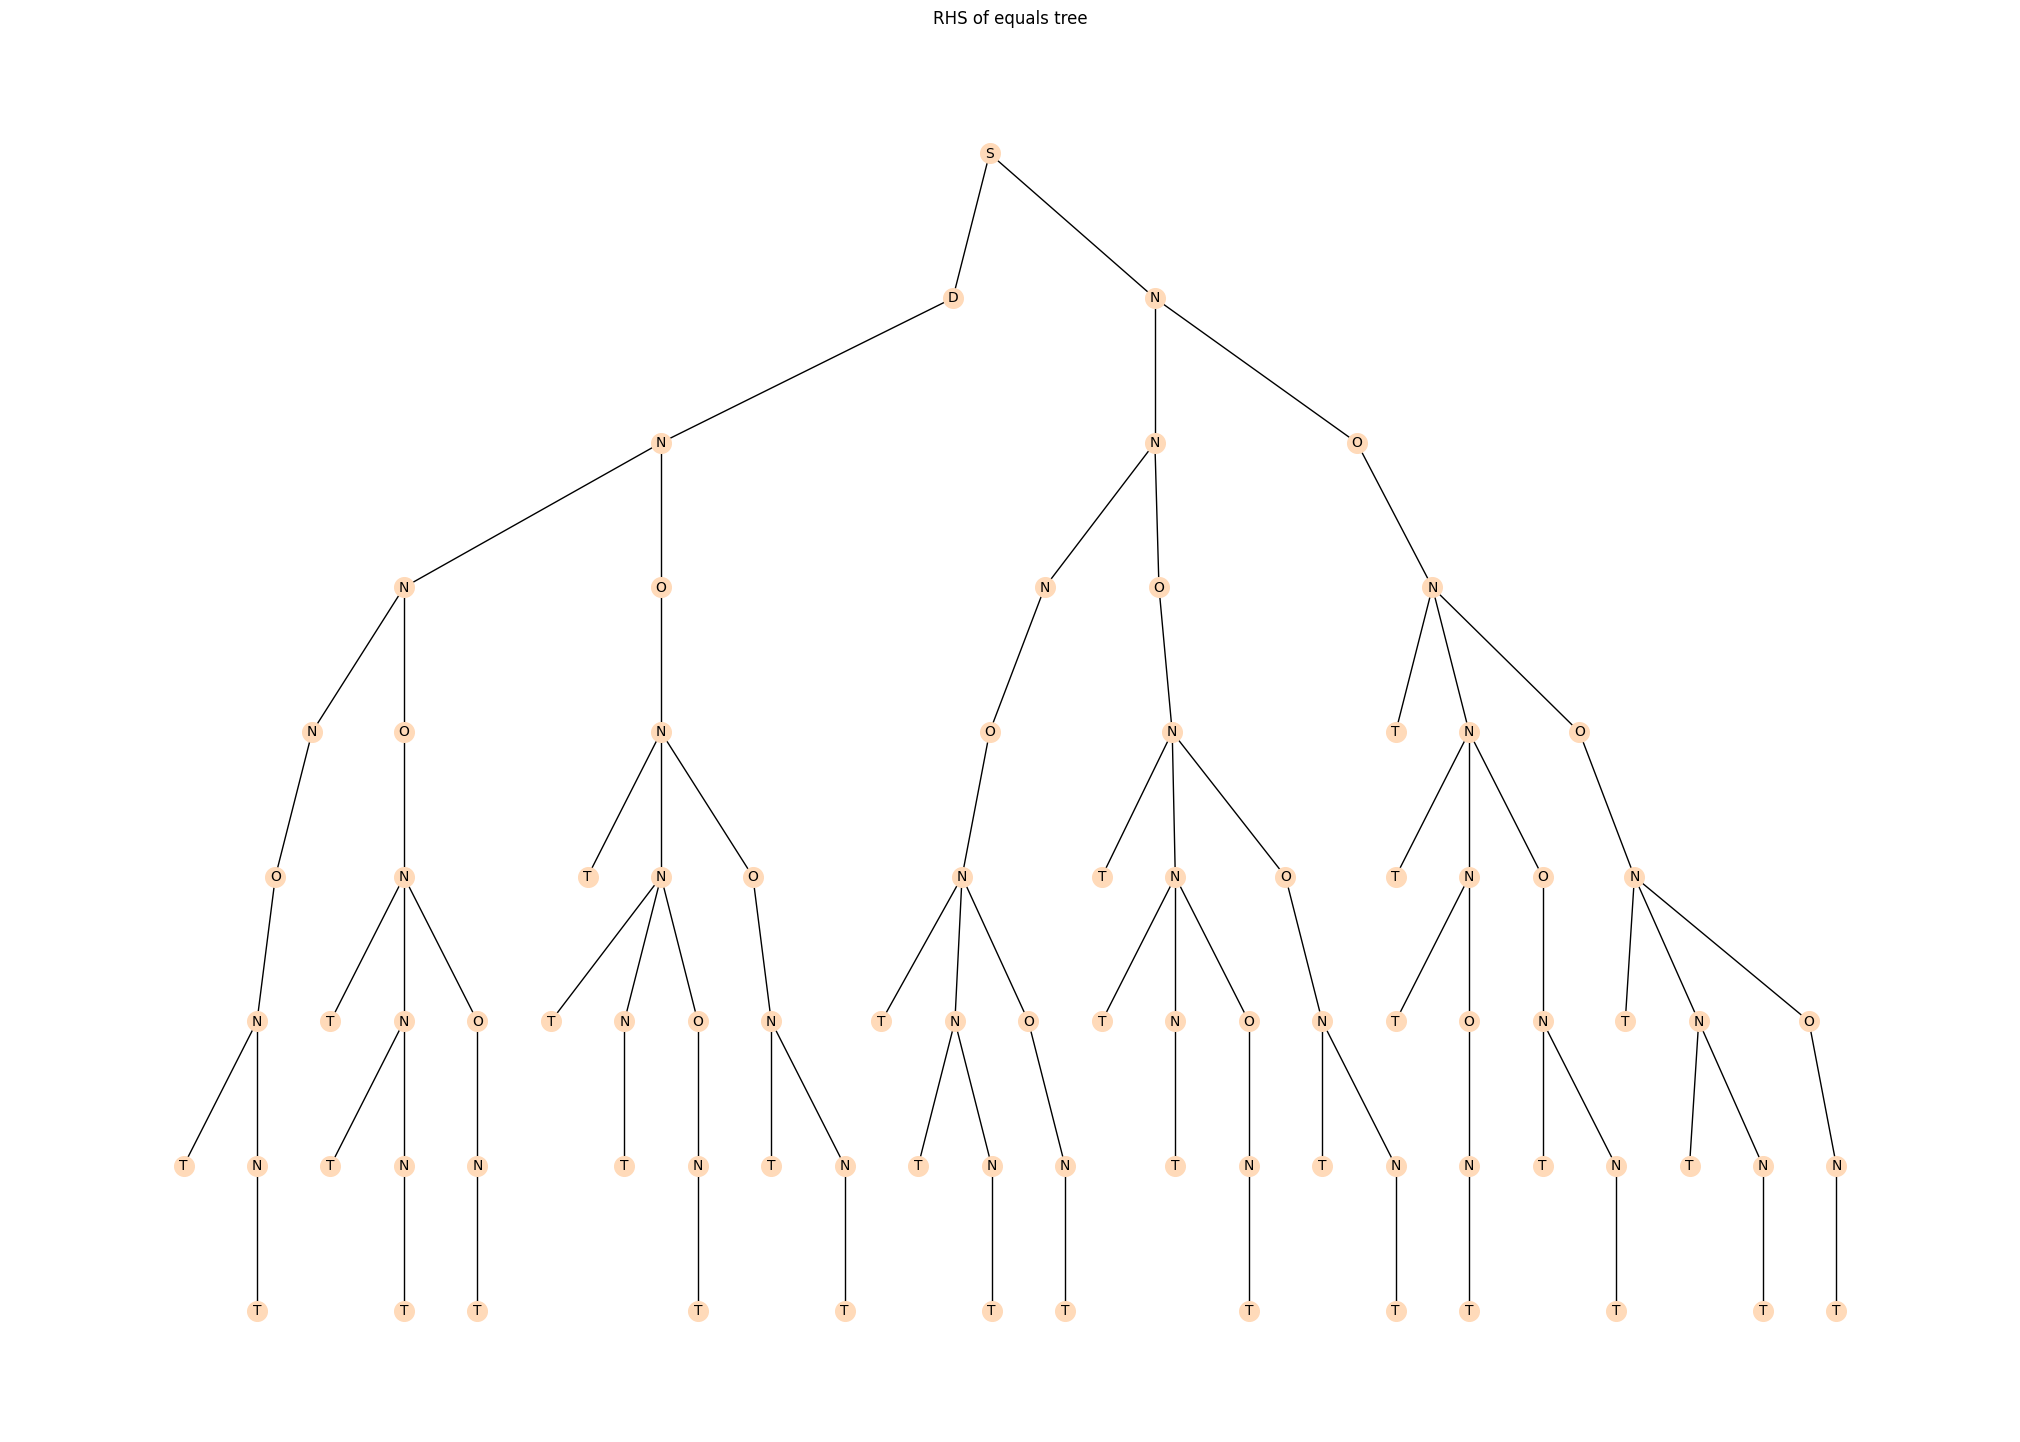

In [47]:
from anytree import Node, RenderTree

# Entity types
S = "S"    # New Start node for RHS
NUM = "N"
OP = "O"
DASH = "D"
TER = "T"

MAX_DEPTH = 7  # root counts as level 0
MAX_CONTIG_NUM = 3

def build_rhs_equals_tree():
    root = Node(S)

    def add_children(parent, depth, path, num_streak, has_op):
        """
        parent: current node (anytree.Node)
        depth: current depth (root is depth 0)
        path: list of entity names (excluding TER)
        num_streak: current contiguous NUM count
        has_op: bool, does this path have any OP so far
        """
        if depth >= MAX_DEPTH:
            # At max depth, only maybe add TER (which isn't counted in depth)
            if parent.name == NUM and has_op:
                Node(TER, parent=parent)
            return

        # Rule 7: TER only allowed after NUM and if OP exists in path
        if parent.name == NUM and has_op:
            Node(TER, parent=parent)

        # Stop at terminator
        if parent.name == TER:
            return

        # Handle node type expansion
        if parent.name == S:
            # Rule 1: S branches to DASH->NUM, NUM
            dash = Node(DASH, parent=parent)
            # now S->DASH->NUM
            num_after_dash = Node(NUM, parent=dash)
            # The following line is critical: 
            # Instead of only adding a NUM node, we branch from here as if we just did S->N
            # So invoke add_children on num_after_dash just like on an S->N
            add_children(num_after_dash, depth+2, path+[DASH, NUM], 1, has_op)
            # Also do S -> NUM as normal (original branch)
            add_children(Node(NUM, parent=parent), depth+1, path+[NUM], 1, has_op)
        elif parent.name == NUM:
            # Rule 2: NUM can go to NUM (if streak < 3), or OP
            if num_streak < MAX_CONTIG_NUM:
                add_children(Node(NUM, parent=parent), depth+1, path+[NUM], num_streak+1, has_op)
            add_children(Node(OP, parent=parent), depth+1, path+[OP], 0, True)
        elif parent.name == OP:
            # Rule 3: OP can go to NUM
            add_children(Node(NUM, parent=parent), depth+1, path+[NUM], 1, has_op)
        elif parent.name == DASH:
            # With new logic, all handling for DASH is via S->DASH->NUM, 
            # so do not expand further from bare DASH nodes.
            pass

    add_children(root, 0, [S], 0, False)
    return root

def prune_last_level_Os_without_terminal_rhs(node, depth, max_depth):
    """
    Remove OP ("O") nodes at depth==max_depth that do not have a "T" child.
    This is a post-build tree cleaning step.
    """
    to_remove = []
    for child in node.children:
        # Post-order traversal to go bottom-up
        prune_last_level_Os_without_terminal_rhs(child, depth+1, max_depth)
        if (
            child.name == OP
            and depth+1 == max_depth
            and not any(grandchild.name == TER for grandchild in child.children)
        ):
            to_remove.append(child)
    for child in to_remove:
        child.parent = None  # Remove node from tree

# Build and display the RHS tree
rhs_tree_root = build_rhs_equals_tree()
# Remove O's at last non-terminal level that have no terminal children, just like in LHS
prune_last_level_Os_without_terminal_rhs(rhs_tree_root, 0, MAX_DEPTH)

rhs_G = nx.DiGraph()
def build_rhs_nx_graph(node, G, parent=None):
    G.add_node(id(node), label=node.name)
    if parent is not None:
        G.add_edge(id(parent), id(node))
    for child in node.children:
        build_rhs_nx_graph(child, G, node)
build_rhs_nx_graph(rhs_tree_root, rhs_G)

def rhs_count_terminals(node):
    count = 1 if node.name == TER else 0
    for child in node.children:
        count += rhs_count_terminals(child)
    return count

rhs_num_terminals = rhs_count_terminals(rhs_tree_root)
print(f"Number of terminal (TER) nodes in RHS tree: {rhs_num_terminals}")

try:
    rhs_pos = nx.nx_pydot.graphviz_layout(rhs_G, prog='dot')
except Exception:
    rhs_pos = nx.spring_layout(rhs_G)

rhs_labels = nx.get_node_attributes(rhs_G, 'label')
plt.figure(figsize=(20, 14))
nx.draw(rhs_G, rhs_pos, with_labels=True, labels=rhs_labels, arrows=False, node_size=200, node_color='peachpuff', font_size=10)
plt.title("RHS of equals tree")
plt.tight_layout(pad=3.0)
plt.show()


Number of terminal (TER) nodes in LHS modified tree: 40


/var/folders/h1/_n_bj8qj1nd9nhqqdqkdgdt40000gn/T/ipykernel_39518/1278444263.py:122: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  lhs_mod_pos = nx.nx_pydot.graphviz_layout(lhs_mod_G, prog='dot')
/var/folders/h1/_n_bj8qj1nd9nhqqdqkdgdt40000gn/T/ipykernel_39518/1278444263.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0)


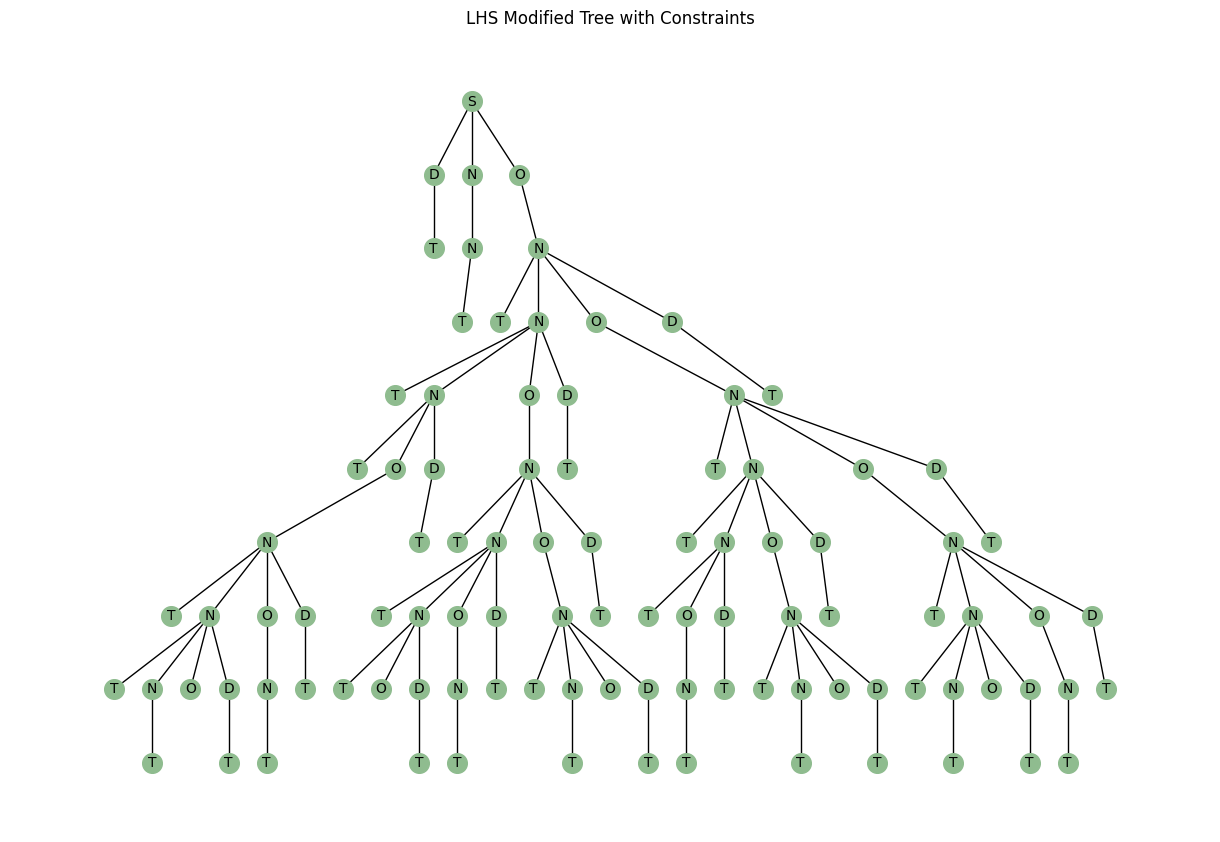

In [48]:

from anytree import Node, RenderTree
import matplotlib.pyplot as plt
import networkx as nx

# RULE/ENTITY CONSTANTS
MAX_DEPTH = 9  # root counts as 1 (levels)
MAX_CONTIG_NUM = 3
S = "S"
NUM = "N"
OP = "O"
DASH = "D"
TER = "T"

def build_lhs_plus_number_tree():
    """
    TREE RULES per instructions:
    2. NUM can branch down to NUM (if not over streak), OP, or DASH
    3. OP can branch to NUM
    4. DASH can branch to NUM but that is the only valid child; after that only TER allowed, and middle - (i.e., num->- ->num->more) is not allowed. - must only be followed by NUM (once), then that NUM must go to TER if rest of rules permit. The - branch is at the leaf
    5. No more than 3 contiguous NUMs per path; e.g., N N N OP N is fine (resets), N N N N not allowed.
    6. Max depth is 8 (root is 1); TER doesn't count as a level
    7. TER only allowed after NUM or DASH and only if branch has OP on path
    8. TER doesn't count as an entity for depth (done by not advancing depth for TER)
    """
    root = Node(S)

    # 1. Hardcoded branch s->d->t
    dash1 = Node(DASH, parent=root)
    Node(TER, parent=dash1)

    # 2. Hardcoded branch s->n->t
    n1 = Node(NUM, parent=root)
    n2 = Node(NUM, parent=n1)
    Node(TER, parent=n2)

    # 3. Hardcoded: s->O->N (the branch s->o must begin s->o->n and then continue recursively)
    op_start = Node(OP, parent=root)
    n_op = Node(NUM, parent=op_start)

    def add_children(parent, depth, path, num_streak, has_op):
        """
        parent: anytree.Node object
        depth: int (root is 1). TER doesn't count
        path: list of entity types (excluding TER)
        num_streak: contiguous number (NUM) count along this branch
        has_op: bool, if any OP exists in path so far
        """
        # If we're at a NUM or DASH and rules for TER are satisfied, we can (optionally) add a TER child.
        if (parent.name == NUM or parent.name == DASH) and has_op:
            Node(TER, parent=parent)

        # Early stop for TER node
        if parent.name == TER:
            return

        # Don't exceed depth; TER does not advance depth
        if depth >= MAX_DEPTH:
            return

        # Rules for each entity
        if parent.name == NUM:
            # 2. NUM can go to NUM (if not over streak), OP, DASH
            if num_streak < MAX_CONTIG_NUM:
                add_children(Node(NUM, parent=parent), depth+1, path+[NUM], num_streak+1, has_op)
            add_children(Node(OP, parent=parent), depth+1, path+[OP], 0, True)
            add_children(Node(DASH, parent=parent), depth+1, path+[DASH], 0, has_op)
        elif parent.name == OP:
            # 3. OP can go ONLY to NUM
            add_children(Node(NUM, parent=parent), depth+1, path+[NUM], 1, has_op)
        elif parent.name == DASH:
            pass 
            # 4. DASH must always end in a terminal (TER). It can only go to NUM, and that NUM must have a TER child (if allowed by rules). No further branching.

    # s->O->N branch (start depth=3; path is [S, O, N]; num_streak=1)
    add_children(n_op, 3, [S, OP, NUM], 1, True)

    return root

# Post-build: Prune OP ("O") nodes at the last level that do not have a "T" child.
def prune_last_level_Os_without_terminal_lhs(node, depth, max_depth):
    """
    Remove OP ("O") nodes at depth==max_depth that do not have a "T" child.
    """
    to_remove = []
    for child in node.children:
        prune_last_level_Os_without_terminal_lhs(child, depth+1, max_depth)
        if (
            child.name == OP
            and depth+1 == max_depth
            and not any(grandchild.name == TER for grandchild in child.children)
        ):
            to_remove.append(child)
    for child in to_remove:
        child.parent = None  # Remove node from tree

# Visualize the modified tree

def build_graph_for_lhs_mod(node, G, parent=None):
    G.add_node(id(node), label=node.name)
    if parent is not None:
        G.add_edge(id(parent), id(node))
    for child in node.children:
        build_graph_for_lhs_mod(child, G, node)

lhs_mod_tree_root = build_lhs_plus_number_tree()
# Prune OPs at the last non-terminal level without any terminal children (just like in the original LHS)
prune_last_level_Os_without_terminal_lhs(lhs_mod_tree_root, 0, MAX_DEPTH)

lhs_mod_G = nx.DiGraph()
build_graph_for_lhs_mod(lhs_mod_tree_root, lhs_mod_G)

def lhs_mod_count_terminals(node):
    count = 1 if node.name == TER else 0
    for child in node.children:
        count += lhs_mod_count_terminals(child)
    return count

lhs_mod_num_terminals = lhs_mod_count_terminals(lhs_mod_tree_root)
print(f"Number of terminal (TER) nodes in LHS modified tree: {lhs_mod_num_terminals}")

try:
    lhs_mod_pos = nx.nx_pydot.graphviz_layout(lhs_mod_G, prog='dot')
except Exception:
    lhs_mod_pos = nx.spring_layout(lhs_mod_G)

lhs_mod_labels = nx.get_node_attributes(lhs_mod_G, 'label')
plt.figure(figsize=(12, 8))
nx.draw(lhs_mod_G, lhs_mod_pos, with_labels=True, labels=lhs_mod_labels, arrows=False, node_size=200, node_color='darkseagreen', font_size=10)
plt.title("LHS Modified Tree with Constraints")
plt.tight_layout(pad=3.0)
plt.show()



Number of terminal (TER) nodes in RHS modified tree: 23


/var/folders/h1/_n_bj8qj1nd9nhqqdqkdgdt40000gn/T/ipykernel_39518/352466746.py:75: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  rhs_mod_pos = nx.nx_pydot.graphviz_layout(rhs_mod_G, prog='dot')
/var/folders/h1/_n_bj8qj1nd9nhqqdqkdgdt40000gn/T/ipykernel_39518/352466746.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0)


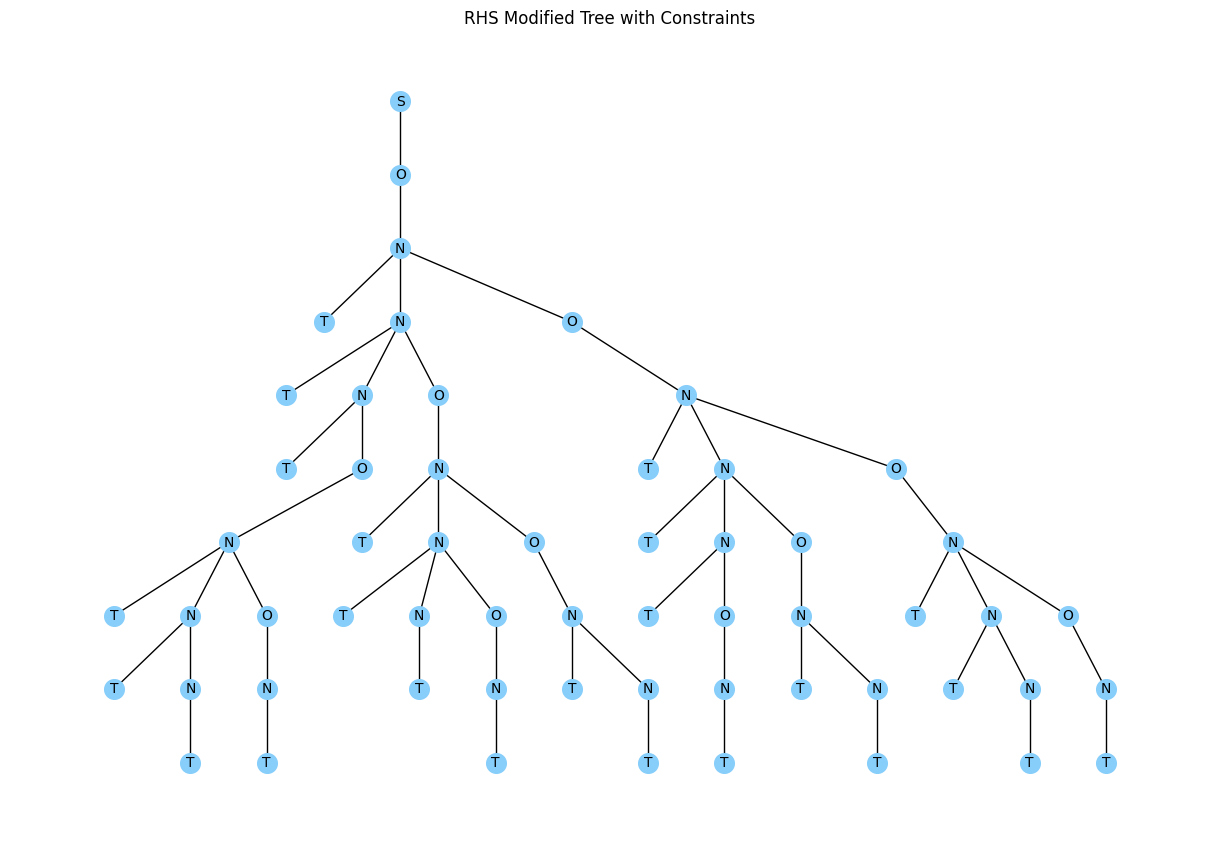

In [49]:
MAX_DEPTH = 8

def build_rhs_plus_number_tree():
    root = Node(S)
    n_op = Node(OP, parent=root)
    n_num = Node(NUM, parent=n_op)

    def add_children(parent, depth, path, num_streak, has_op):
        """
        parent: current node (anytree.Node)
        depth: current depth (root is depth 0)
        path: list of entity names (excluding TER)
        num_streak: current contiguous NUM count
        has_op: bool, does this path have any OP so far
        """
        if depth >= MAX_DEPTH:
            if parent.name == NUM and has_op:
                Node(TER, parent=parent)
            return

        # Rule 7: TER only allowed after NUM and if OP exists in path
        if parent.name == NUM and has_op:
            Node(TER, parent=parent)

        if parent.name == TER:
            return

        if parent.name == OP:
            add_children(Node(NUM, parent=parent), depth+1, path+[NUM], 1, has_op)
        elif parent.name == NUM:
            if num_streak < MAX_CONTIG_NUM:
                add_children(Node(NUM, parent=parent), depth+1, path+[NUM], num_streak+1, has_op)
            add_children(Node(OP, parent=parent), depth+1, path+[OP], 0, True)

    add_children(n_num, 2, [S, OP, NUM], 1, True)
    return root

# Prune all OP ("O") nodes at the last non-terminal level without any terminal ("T") children
def prune_last_level_Os_without_terminal_rhs(node, depth, max_depth):
    to_remove = []
    for child in node.children:
        prune_last_level_Os_without_terminal_rhs(child, depth+1, max_depth)
        if (
            child.name == OP
            and depth+1 == max_depth
            and not any(grandchild.name == TER for grandchild in child.children)
        ):
            to_remove.append(child)
    for child in to_remove:
        child.parent = None  # Remove node from tree

def build_graph_for_rhs_mod(node, G, parent=None):
    G.add_node(id(node), label=node.name)
    if parent is not None:
        G.add_edge(id(parent), id(node))
    for child in node.children:
        build_graph_for_rhs_mod(child, G, node)

rhs_mod_tree_root = build_rhs_plus_number_tree()
# Prune all O's at last non-terminal level with no terminal child:
prune_last_level_Os_without_terminal_rhs(rhs_mod_tree_root, 0, MAX_DEPTH)
rhs_mod_G = nx.DiGraph()
build_graph_for_rhs_mod(rhs_mod_tree_root, rhs_mod_G)

def rhs_mod_count_terminals(node):
    count = 1 if node.name == TER else 0
    for child in node.children:
        count += rhs_mod_count_terminals(child)
    return count

rhs_mod_num_terminals = rhs_mod_count_terminals(rhs_mod_tree_root)
print(f"Number of terminal (TER) nodes in RHS modified tree: {rhs_mod_num_terminals}")

try:
    rhs_mod_pos = nx.nx_pydot.graphviz_layout(rhs_mod_G, prog='dot')
except Exception:
    rhs_mod_pos = nx.spring_layout(rhs_mod_G)

rhs_mod_labels = nx.get_node_attributes(rhs_mod_G, 'label')
plt.figure(figsize=(12, 8))
nx.draw(rhs_mod_G, rhs_mod_pos, with_labels=True, labels=rhs_mod_labels, arrows=False, node_size=200, node_color='lightskyblue', font_size=10)
plt.title("RHS Modified Tree with Constraints")
plt.tight_layout(pad=3.0)
plt.show()


In [50]:
# = applies build_lhs_equals_tree max depth=7 on the left and build_rhs_equals_tree on the right
# 8=8 applies build_lhs_plus_number_tree on the left and build_rhs_plus_number_tree on the right
#-8=-8 applies build_lhs_equals_tree with max_depth+1=8 from the = version on the left and build_rhs_plus_number_tree on the right